# LLM Evaluation Metrics Made Easy

Source:

https://machinelearningmastery.com/llm-evaluation-metrics-made-easy/


In [ ]:
# !pip install evaluate rouge_score transformers torch


In [2]:
import evaluate
import rouge_score
import absl
import transformers 
import torch
import numpy as np

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Evaluation Metrics From Inside

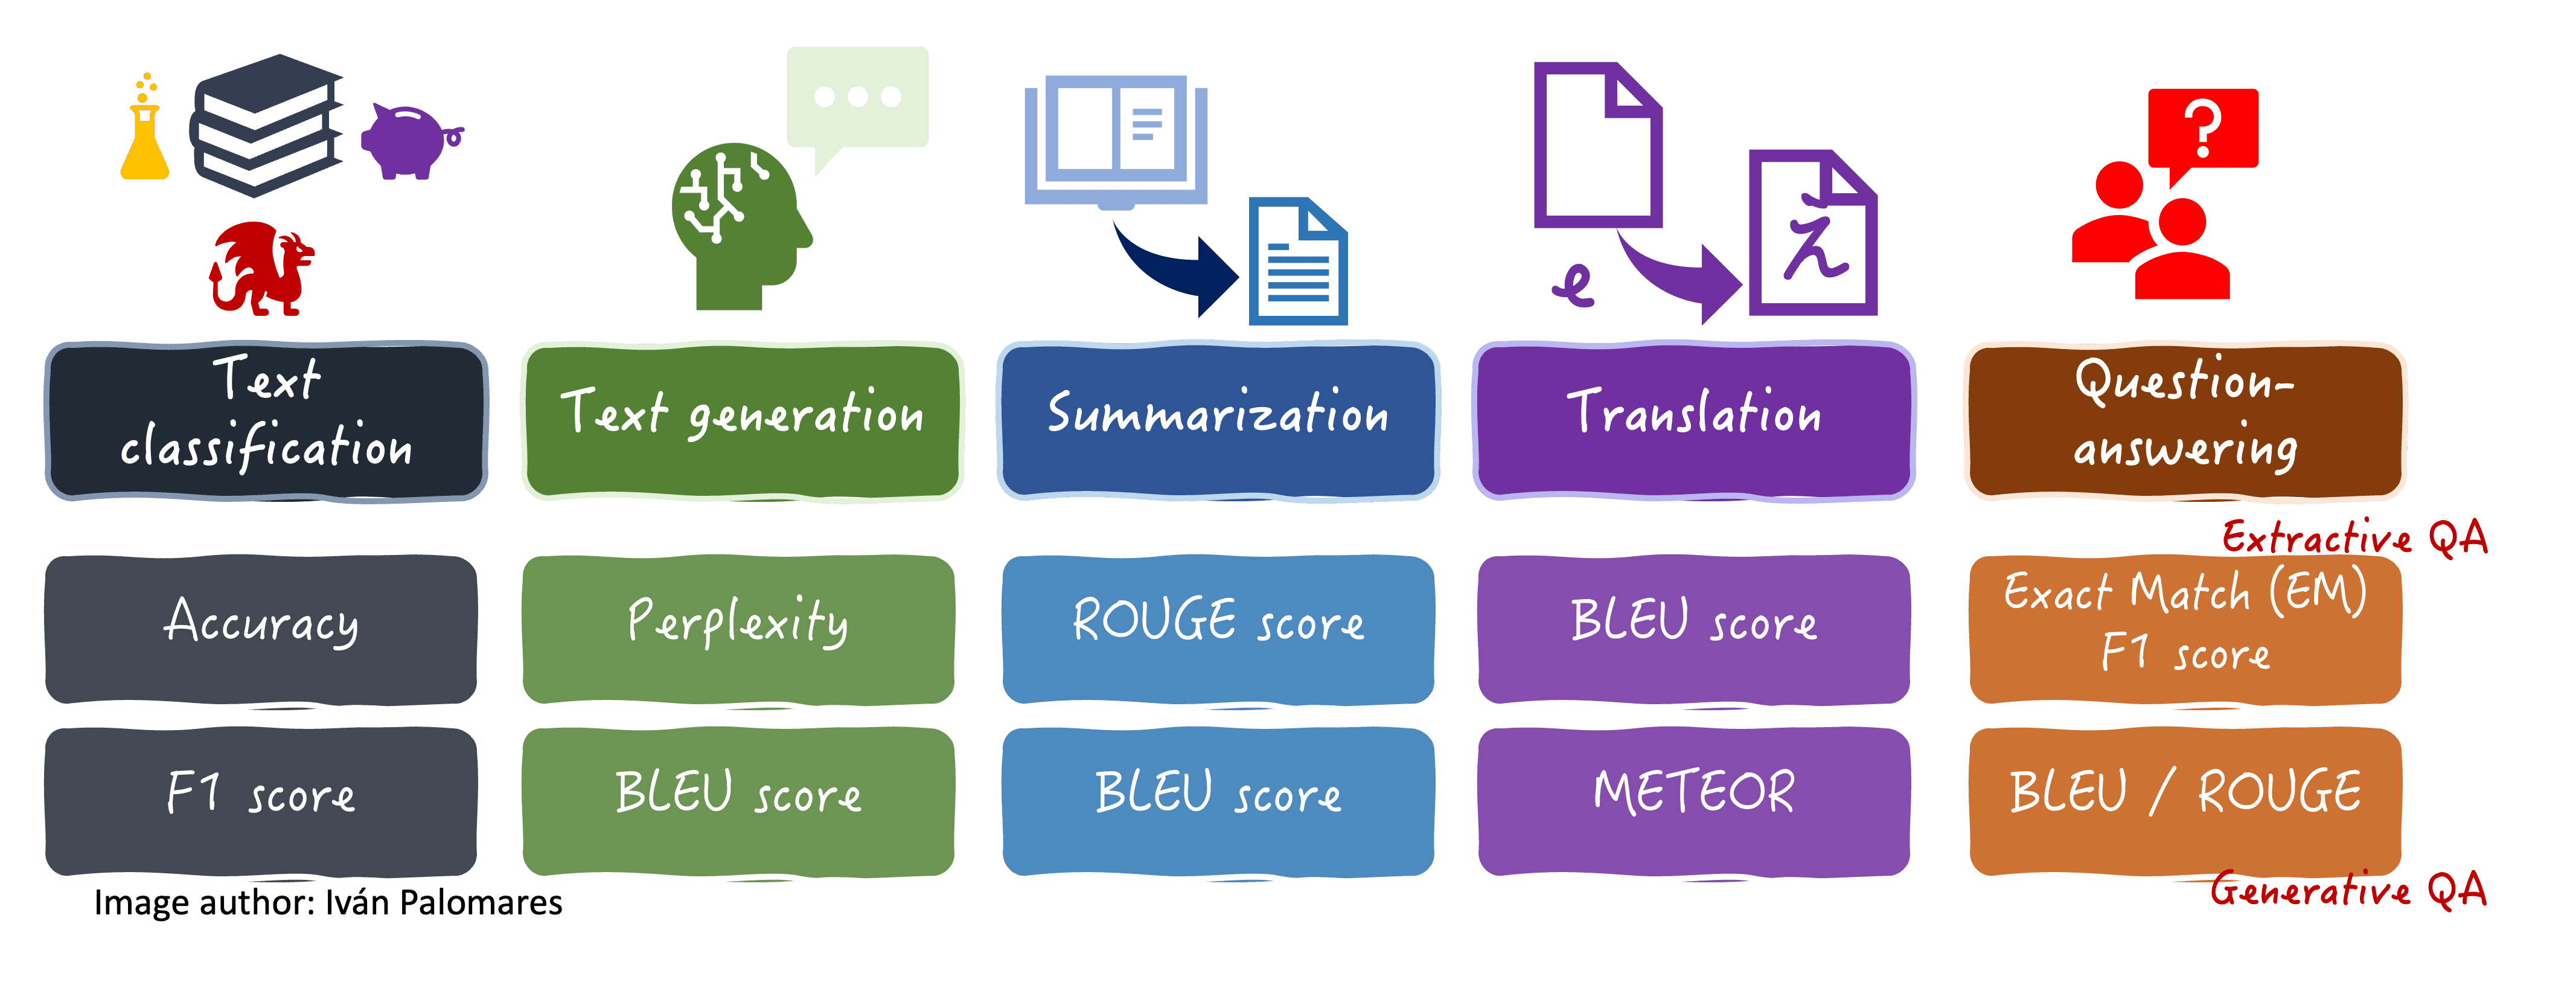

In [3]:
from IPython.display import Image
Image(filename="./figures/LLM_metrics.png", embed=True, width = 800, height = 400)

### Accuracy and F1 Score

This example code shows both metrics in action, using Hugging Face libraries, pre-trained LLMs, and the aforesaid metrics to evaluate the classification of several texts into related vs non-related to the Japanese Tea Ceremony or 茶の湯 (Cha no Yu).

In [4]:
# Sample dataset about Japanese tea ceremony
references = [
    "The Japanese tea ceremony is a profound cultural practice emphasizing harmony and respect.",
    "Matcha is carefully prepared using traditional methods in a tea ceremony.",
    "The tea master meticulously follows precise steps during the ritual."
]
 
predictions = [
    "Japanese tea ceremony is a cultural practice of harmony and respect.",
    "Matcha is prepared using traditional methods in tea ceremonies.",
    "The tea master follows precise steps during the ritual."
]
 
# Accuracy and F1 Score
accuracy_metric = evaluate.load("accuracy")
f1_metric = evaluate.load("f1")
 
# Simulate binary classification (e.g., ceremony vs. non-ceremony)
labels = [1, 1, 1]  # All are about tea ceremony
pred_labels = [1, 1, 1]  # Model predicts all correctly
 
accuracy = accuracy_metric.compute(predictions=pred_labels, references=labels)
f1 = f1_metric.compute(predictions=pred_labels, references=labels, average='weighted')
 
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: {'accuracy': 1.0}
F1 Score: {'f1': 1.0}


### Perplexity 

Perplexity measures how well an LLM predicts a sample-generated text by looking at each generated word’s probability of being the chosen one as next in the sequence.

In [5]:
# Perplexity (using a small GPT2 language model)
perplexity_metric = evaluate.load("perplexity", module_type="metric")
perplexity = perplexity_metric.compute(
    predictions=predictions, 
    model_id='gpt2'  # Using a small pre-trained model
)
print("Perplexity:", perplexity)

100%|██████████| 1/1 [00:00<00:00,  6.53it/s]

Perplexity: {'perplexities': [115.34934997558594, 324.6385803222656, 417.0871276855469], 'mean_perplexity': 285.6916859944661}


### ROUGE, BLEU and METEOR Scores

**BLEU, ROUGE, and METEOR** are particularly used in translation and summarization tasks.

Both language understanding and language generation efforts are equally needed: 

- **BLEU, ROUGE, and METEOR** scores assess the similarity between generated and reference texts (e.g. provided by human annotators). 
- **BLEU** focuses on precision by counting matching n-grams, being mostly used to evaluate translations. 
- **ROUGE** measures recall by examining overlapping language units, often used to evaluate summaries. 
- **METEOR** adds sophistication by considering additional aspects like synonyms, word stems, and more.

In [6]:
# ROUGE Score (no LLM loaded, using pre-defined lists of texts as LLM outputs (predictions) and references)
rouge_metric = evaluate.load('rouge')
rouge_results = rouge_metric.compute(
    predictions=predictions, 
    references=references
)
print("ROUGE Scores:", rouge_results)
 
# BLEU Score (no LLM loaded, using pre-defined lists of texts as LLM outputs (predictions) and references)
bleu_metric = evaluate.load("bleu")
bleu_results = bleu_metric.compute(
    predictions=predictions, 
    references=references
)
print("BLEU Score:", bleu_results)
 
# METEOR (requires references to be a list of lists)
meteor_metric = evaluate.load("meteor")
meteor_results = meteor_metric.compute(
    predictions=predictions, 
    references=[[ref] for ref in references]
)
print("METEOR Score:", meteor_results)

ROUGE Scores: {'rouge1': 0.8602339181286549, 'rouge2': 0.6718162012279659, 'rougeL': 0.8602339181286549, 'rougeLsum': 0.8602339181286549}


BLEU Score: {'bleu': 0.5260257094802832, 'precisions': [0.9375, 0.7241379310344828, 0.5384615384615384, 0.391304347826087], 'brevity_penalty': 0.8553453273074225, 'length_ratio': 0.8648648648648649, 'translation_length': 32, 'reference_length': 37}


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


METEOR Score: {'meteor': 0.8462650219142979}


### Exact Match

**Exact match (EM)** is used in extractive question-answering use cases. 

It checks whether a model’s generated answer completely matches a “gold standard” reference answer

In [7]:
# Exact Match
def exact_match_compute(predictions, references):
    return sum(pred.strip() == ref.strip() for pred, ref in zip(predictions, references)) / len(predictions)
 
em_score = exact_match_compute(predictions, references)
print("Exact Match Score:", em_score)

Exact Match Score: 0.0
